# Marginal 1-dim posteriors from image data

- Using SWYFT core functions (i.e. look at swyft/core.py)
- Demonstrates `head` network

Author: Christoph Weniger and Benjamin Miller, August 2020

In [24]:
import numpy as np
import pylab as plt
import swyft
import torch
from scipy import stats
%load_ext autoreload
%autoreload 2

np.random.seed(25)
torch.manual_seed(25)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [31]:
DEVICE = 'cuda:0'
NDIM = 64 # number of parameters
NBINS = 1000

In [32]:
SIGMA = 0.2
def model(z):
    x = z
    return x

def noisemodel(x, z = None):
    n = np.random.randn(*x.shape)*SIGMA  #*noiselevel
    return x + n

In [33]:
z0 = np.ones(NDIM)*0.5
x0 = noisemodel(model(z0))

In [34]:
ds = swyft.DataStoreZarr("/home/ubuntu/volume1/high5.zarr")
ds.init(zdim = NDIM, xdim = (NDIM,))

Creating empty datastore: /home/ubuntu/volume1/high5.zarr
...don't forget to run `init` to set up storage parameters.
Datastore initialized.


In [ ]:
sw_list = []

for i_round in range(1):
    parent = None if len(sw_list) == 0 else sw_list[-1]
    sw = swyft.SWYFT(x0, zdim = NDIM, device = DEVICE, head = None, datastore = ds, nsamples = 3000, noisemodel = noisemodel, parent = parent)
    sw_list.append(sw)
    
    if sw.requires_sim():
        for i in ds.require_sim():
            z = ds.z[i]
            x = model(z)
            ds.add_sim(i, x)
            
    sw.train1d(max_epochs = 100, nbatch = 16)

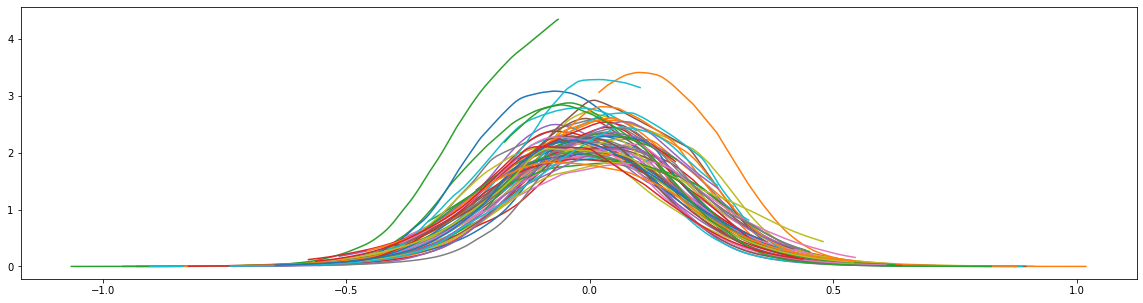

In [30]:
plt.figure(figsize=(20, 5))
for i in range(NDIM):
    z, p = sw_list[-1].posterior(i)
    #plt.axvline(x0[i])
    plt.plot(z-x0[i], p)